<a href="https://colab.research.google.com/github/jgreg4/ML-ImageClassify-Tutorial/blob/main/ML_Problems_ImageClassification_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
---
## **0. To Run all cells at once, do this:**

With a GPU processing the training cells it should take around 5-7 minutes to run all cells. If worst case a CPU is processing, it could take up to 1.5-3 hours.

---
* On your keyboard press 'Ctrl + F9'
  * Or on the top menu go to 'Runtime' and click on 'Run all'
* click 'connect to Google Drive' when prompted to do so
* click on your google username to choose your account
  * you should be signed into your google account to use google colab so your username should already be available to click on
* click 'Continue' for terms of service
* click 'Continue' for google drive access

---
---


In [1]:
# The following is to allow access to datasets that have been saved on google drive
from google.colab import drive
drive.mount('/content/drive')

import time
import numpy as np

# For timing all cells
startT_all = np.datetime64('now')


Mounted at /content/drive


---
---
## **1. Building Image Dataset and Transfer Learning Tutorial**

##### __by J. Griego__

#### This tutorial describes the process to build your own mini dataset (1250 images) from scratch. The image dataset here is composed of camera trap images of animals (deer, puma, elk, coyote, and bear). The dataset has both day and night images (625 day and 625 night).

---
---

---
---
## **2. Assemble your own dataset (option 1)**


### <summary>To assemble an image dataset, take the following steps:</summary>
---
  * Build dataset from camera trap repos
    * Dataset description
      * collect full resolution images that clearly show your class (not to be confused as python class) of interest
        * this could be different flower types, animal types, or other features of interest
    * When sourcing images
      * find images that are public domain
    * This tutorial: 5 animal classes of interest (deer, puma, elk, coyote, bear)
      * keep separate datasets of color images vs gray type images
        * Day (color) vs Night (gray)
        * if you keep a balanced number of color vs gray images you can mix the day and night images (this could lead to poor validation losses and accuracies)
      * doing this lead to 5 different class folders '0' - '4'
    * Number of images:
      * collected ~ 125 unique images for each class
        * ideally there would be more numbers per class but the low number is due to time limitations and the repo only containing enough images for 125 color puma and 125 gray puma image types
        * potential for growth/future work could be to add more images from new sources
          * this could be done by simply adding more images to each folder for training, validation, and testing
      * 100 training images per class (80%)
      * 12 validation images per class (10%)
      * 13 testing images per class (10%)
      * this is a tiny dataset (but works for tutorial purposes), for comparison ImageNet contains ~1000 images per class
  * Database folder structure:
    * Dataset_/train/
      * class_0
        * 0001.jpg
        * ...
        * 0100.jpg
      * ...
      * class_4
        * 0001.jpg
        * ...
        * 0100.jpg
    * Dataset_/val/
      * class_0
        * 0001.jpg
        * ...
        * 0012.jpg
      * ...
      * class_4
        * 0001.jpg
        * ...
        * 0012.jpg
    * Dataset_/test/
      * class_0
        * 0001.jpg
        * ...
        * 0013.jpg
      * ...
      * class_4
        * 0001.jpg
        * ...
        * 0013.jpg
  * Class naming description (i.e. output labels this could be either color or gray depending on which dataset you want to try)
    * class_0 : deer
    * class_1 : puma
    * class_2 : elk
    * class_3 : coyote
    * class_4 : bear
---
Example of image repositories/sources:
* Image Source 1: eMammal camera trap research project
  * link: [eMammal](https://emammal.si.edu/)
  * search an animal class name ('deer') and save images as *.jpg or similar
* Image Source 2: US Fish and Wildlife Service
  * link: [FWS](https://www.fws.gov/search/images?$keywords=%22deer%22)
  * the above searches for images of 'deer'
* Image Source 3: US National Park Service
  * link: [NPS](https://www.nps.gov/media/multimedia-search.htm#sort=score+desc&q=deer)
* This tutorial's zipped datasets are located here for ease and further inspection:
  * link:  [jgreg4 GitHub](https://github.com/jgreg4/ML-ImageClassify-Tutorial)
  * 'Dataset_images_mini_day.zip' (~21 MB)
  * 'Dataset_images_mini_night.zip' (~12 MB)
    * Google Drive has 15 GB capacity for free-tier
    * GitHub has 500 MB capacity for  free-tier
---
Other image selection notes/tips:
  * Ideally do not mix gray and color type images in the same folder unless you have an equal balance between the two types
  * Do not use images collected from video frames (there is not enough variation to adequately train the model between sequential frames)
    * A separate model that learns from only video frames can be completed by using ~10 different videos as the training, validation, and test data
    * Make sure that all the used video frames have some uniqueness where animals or feature of interest have unique backgrounds, etc
  * Keep a separate folder for each training, validation, and test image set
  * If you decide to perform image transformations, treat all transformed images as the same class that they originated from (do not mix training and validation and/or test)
    * You do not want transformed images in both the training set and testing set (keeping separate folders will prevent this)


---
---

---
---
## **3. Borrow or download a dataset (options 2 or 3)**


  <summary>To borrow/download a dataset, take the following steps:</summary>

* This method is not recommended for this tutorial since the datasets (Caltech and ImageNet) are too large for a standard Google Drive upload.
  * Google Drive has 15 GB capacity for free-tier
* These options are just included for awareness.
---       
  * Download from Caltech Camera Traps (option 2)
    * Full resolution images
    * Dataset size: ~ 105 GB
      * This is too large for a tutorial
    * https://lila.science/datasets/caltech-camera-traps
---
  * Download from ImageNet (option 3)
    * Images scaled to 64 x 64
    * Dataset size: ~ 12.5 GB (unscaled dataset is ~1.08 TB)
      * This is too large for a tutorial
    * link: https://image-net.org/download.php
---
  * Load in CIFAR-10 from Torchvision (option 4)
    * Images scaled to 32 x 32
    * Dataset size: ~ 170 MB
      * This unfortunately did not have the classes/animal types of interest
    * link: https://www.cs.toronto.edu/~kriz/cifar.html
    * code below showing how to load in and display some images
    * closest images to what this tutorial seeks
      * deer
      * horse
      * dog
      * cat
    * Resolution on these images is poor, custom image resolutions much better

---
---

In [2]:
# Read in CIFAR-10
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader, Subset
import matplotlib.pyplot as plt


# Define the classes you want
desired_classes = ['deer', 'dog']
#desired_classes = ['deer', 'horse', 'dog', 'cat']

# Load the CIFAR-10 dataset
transform = transforms.Compose([transforms.ToTensor()])
cifar10 = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

# Filter the dataset to include only the desired classes
indices = [i for i, (_, label) in enumerate(cifar10) if cifar10.classes[label] in desired_classes]
filtered_dataset = Subset(cifar10, indices)

# Count the number of images for each desired class
class_counts = {class_name: 0 for class_name in desired_classes}

for _, label in filtered_dataset:
    class_name = cifar10.classes[label]
    if class_name in class_counts:
        class_counts[class_name] += 1

# Print the counts
print("Counts of images in the filtered dataset:")
for class_name, count in class_counts.items():
    print(f"{class_name}: {count}")

# Create a DataLoader
data_loader_CF10 = DataLoader(filtered_dataset, batch_size=32, shuffle=True)

100%|██████████| 170M/170M [00:02<00:00, 78.8MB/s]


Counts of images in the filtered dataset:
deer: 5000
dog: 5000


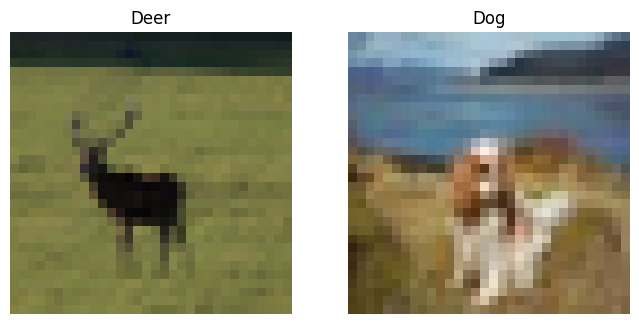

In [3]:
# Plot some CIFAR-10 images
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))  # Rearrange dimensions for plotting
    plt.axis('off')

# Get the first image of deer and dog- each time you rerun this it will show a
# different deer or dog image since the dataset is shuffled above with 'TRUE'
deer_image = None
bear_image = None

for inputs, labels in data_loader_CF10:
    # Find a deer image - label for deer is 4
    for i in range(len(labels)):
        if labels[i] == 4:
            deer_image = inputs[i]
            break
    # Find a dog image - label for dog is 5
    for i in range(len(labels)):
        if labels[i] == 5:
            bear_image = inputs[i]
            break
    if deer_image is not None and bear_image is not None:
        break

# Plot the images
plt.figure(figsize=(8, 8))

# Plot deer image
plt.subplot(1, 2, 1)
imshow(deer_image)
plt.title('Deer')

# Plot bear image
plt.subplot(1, 2, 2)
imshow(bear_image)
plt.title('Dog')

plt.show()

---
---
## **4. Change Runtime Type to GPU if Available**


###  <summary>These steps are important to ensure efficient training times:</summary>

* CPU training in the scenarios I encountered took ~6.5x longer to train the model- GPU training is preferred.
* To swithch to the GPU
  * Click 'Runtime' at the top menu bar, 'Change runtime type' to 'T4 GPU' or similar
* GPU use is limited based on availability through Google, to subscribe to allow additional GPU usage see below:
  * Google Colab Pro $9.99/mo
[Pricing](https://colab.research.google.com/signup?utm_source=resource_tab&utm_medium=link&utm_campaign=payg_learn_more)
  * Only do this if free-tier Google Colab is not sufficient for your model training needs
* The below code checks to see if GPU usage is currently available
  * No GPU available if it says 'nvidia-smi: command not found'
  * GPU available if it shows you GPU information with NVIDIA-SMI information, etc.

---
---       

In [4]:
# Checks if GPU usage is available

import torch
torch.cuda.is_available()
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


---
---
## **5. Google Drive setup with the assembled dataset**

###  <summary>To setup Google Drive with the assembled dataset:</summary>
---
Now that the dataset has been assembled, here is some example code to get the dataset ready for example image viewing.
* Login to your google account (create one if you haven't already) and navigate to google drive
  * https://workspace.google.com/products/drive/
* Click 'Sign in' button
* Click on 'My Drive'
* Assuming you have set up your database folder structure according to the guidlines above, you can drag and drop your main folder into 'My Drive'
* For ease find a zipped dataset that is ready to process here: [jgreg4 GitHub](https://github.com/jgreg4/ML-ImageClassify-Tutorial)
  * Upload both zip folders to your 'My Drive'
  * You can model your own dataset after this and you would just drag and drop your zipped folder into 'My Drive'
* Otherwise do the following (this is not recommended since this will create a lot more work than just a simple drag and drop of your dataset folder):
  * Right-click and select 'New folder'
    * Create a folder called 'Dataset_image'
      * Within 'Dataset_image' you should create these separate folders
        * train
        * val
        * test
          * each of the above folders will contain:
            * class\_0
            * class\_1
            * class\_2
            * class\_3
            * class\_4
            * class\_5
            * class\_6
            * class\_7
            * class\_8
            * class\_9

---
---

In [5]:
# The following is to allow access to datasets that have been saved on google drive
#from google.colab import drive
#drive.mount('/content/drive')

# load necessary libraries for plotting etc- some of the libraries are loaded above
import zipfile
import os
import datetime
from PIL import Image
import matplotlib.pyplot as plt
import tempfile
import shutil

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import torchvision
from torch.utils.data import DataLoader, Dataset, Subset
from torchvision import datasets, transforms, models
from tempfile import TemporaryDirectory
from sklearn.metrics import roc_curve, auc, confusion_matrix
import seaborn as sns
cudnn.benchmark = True

# For timing
startT = np.datetime64('now')

# File name and path setting
fileName = 'Dataset_images_mini_day.zip'
#fileName = 'Dataset_images_mini_night.zip'

# Make sure to set this accordingly it will be used later in modeling, etc.
DatasetClasses = 5

# Also make sure to set specific labels that represent your dataset
# Make sure the number of labels match the 'DatasetClasses' above
new_labels = ['deer', 'puma', 'elk', 'coyote', 'bear']

zip_file_path = (
    f'/content/drive/My Drive/'
    f'{fileName}'
    )
extracted_database = '/content/Dataset_images/'

os.makedirs(extracted_database, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
  zip_ref.extractall(extracted_database)

print(f"Zip database extracted: {extracted_database}")

# For timing
endT = np.datetime64('now')
print(f"Time elapsed (seconds): {endT - startT}")

# ~ 31 s full resolution dataset
#    4 s mini dataset

Zip database extracted: /content/Dataset_images/
Time elapsed (seconds): 1 seconds


---
---
## **6. A Quick Look at a Dataset Sample**

* The section immediately below is a brief code example to display images of the deer class
  * this is the $1^{st}$ image of the deer training dataset (0001.jpg)
* A quick look at the assembled dataset with a program such as FIJI/ImageJ showed that there is a variety of different image sizes
  * approx largest: 4000 x 3000 pixels
  * approx smallest: 130 x 130 pixels
  * there could be larger or smaller within the entire dataset
  * this must be addressed with a preprocessing step to ensure an image size of 224 x 224 for effective uniformity between different transfer learning models etc.
  * This preprocessing was completed on each of the mini datasets
* The generic description of the input dataset size for training (assuming color rgb) would be the following:
  * 500 x 3 x 224 x 224
  * number of images, rgb color channels, pixel height, pixel width
  * the validation set would have 60 for the first value
  * the test set would have 65 for the first value
---
---

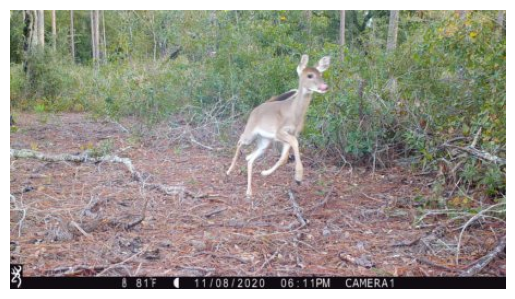

In [6]:
# Display some training images

# Image number- choose a number between 0 and 99
imageNo = 0

# Class numbers in order from 0 to 4
# 0 - deer, 1 - puma, 2 - elk, 3 - coyote, 4 - bear
classNo = 0

# Path setting
image_example_path = (
    f'/content/Dataset_images/train/'
    f'class_{str(classNo)}/'
    f'{str(imageNo+1).zfill(4)}.jpg'
)

# Opening image
img = Image.open(image_example_path)

# Display the example image
plt.imshow(img)
plt.axis('off')
plt.show()

---
---
## **7. Read in Full Dataset and augment data (training, validation, and testing)**

* Augmenting your dataset helps if you have a limited number of images (<1000 per class) and it helps your model generalize/predict for unseen images
* Some potential augmentations could be
  * center cropping to remove image labeling/borders
  * image flipping (vertical and horizontal)
  * image rotation
  * RGB color modifications to simulate new imagery
  * image resolution adjustments/resizing to match transfer learning model architectures
* Important Findings (these errors lead to bad model validation loss/accuracy early on)
  * Later in this tutorial a pretrained model (resnet18) was chosen as a transfer learning model to apply
    * In choosing this model it wasn't immediately known that the images must be normalized to a certain specification
      * mean=[0.485, 0.456, 0.406]
      * std=[0.229, 0.224, 0.225]
    * The model would train but the model validation loss and accuracy would stall and not improve to acceptable levels- pay close attention to requirement for pretrained model usage
    * Link to more information for [resnet18](https://pytorch.org/vision/main/models/generated/torchvision.models.resnet18.html)
  
---
---


In [7]:
# Dataset loading and image transformation workflow
dataset_path = '/content/Dataset_images'
squareDimension = 256
finalDimension = 224
batchSize = 32
rotation_angle = 30

# Training set transforms for image conversion and augmentation
# transforms could include resize, crop, vertical flip, horizontal flip, rotation, image color changes based on what is commented out
train_transform = transforms.Compose([
    transforms.Resize((squareDimension, squareDimension)),
    transforms.CenterCrop(finalDimension),
    transforms.RandomVerticalFlip(),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(rotation_angle),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # ImageNet Mean and Standard Deviation default
])

# Validation and Test set transforms for image conversion and augmentation
val_test_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # ImageNet Mean and Standard Deviation default
])

# Set training, validation, and test set path and associated transforms
train_data = datasets.ImageFolder(
    root=f'{dataset_path}/train',
    transform=train_transform
)
val_data = datasets.ImageFolder(
    root=f'{dataset_path}/val',
    transform=val_test_transform
)
test_data = datasets.ImageFolder(
    root=f'{dataset_path}/test',
    transform=val_test_transform
)

# Use Dataloader with to load data
train_loader_example = DataLoader(train_data, batch_size=batchSize, shuffle=False)

train_loader = DataLoader(train_data, batch_size=batchSize, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batchSize, shuffle=False)
test_loader = DataLoader(test_data, batch_size=batchSize, shuffle=True)

# Extract data sizes
train_size = len(train_data)
val_size = len(val_data)
test_size = len(test_data)

# Print the sizes
print(f"Training size: {train_size}")
print(f"Validation size: {val_size}")
print(f"Test size: {test_size}")

# Print the labels
class_labels = train_data.classes
print("Labels:", class_labels)

Training size: 500
Validation size: 60
Test size: 65
Labels: ['class_0', 'class_1', 'class_2', 'class_3', 'class_4']


## **8. Image Transformation Vs Raw Image Example**


Transformed image size (num channels, pixel height, pixel width):
torch.Size([3, 224, 224])


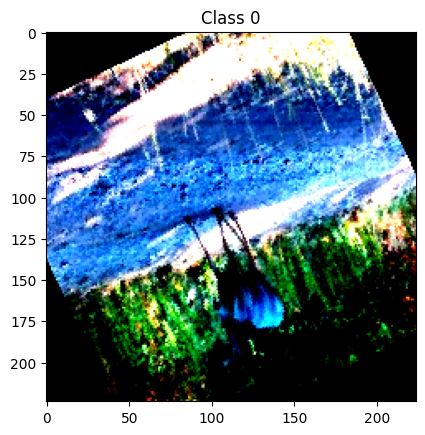


Raw image size (num channels, pixel height, pixel width):
(3, 256, 455)


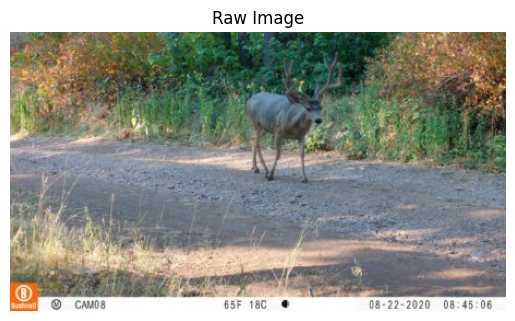

In [8]:
# Adapted from pytorch tutorial transfer learning:
# Link: https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html

# Pick a number between 0 and 31- since batch size is 32
# This is to display different example images
image_exampleNo = 31

# Define Class for image plotting
def imshow(inp, title=None):
    """Display image for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

# get a batch of training data
dataiter = iter(train_loader_example)
images, labels = next(dataiter)

# Get a single image (first image from the batch)
image = images[image_exampleNo]
label = labels[image_exampleNo]

# Get and print the transformed image size
print(
    f'\nTransformed image size (num channels, pixel height, pixel width):\n'
    f'{image.shape}'
    )

# Plot the image
imshow(image, title=f"Class {label.item()}")

# Set path to image database within google colab
image_example_path = (
    f'/content/Dataset_images/train/class_0/'
    f'{str(image_exampleNo+1).zfill(4)}.jpg'
)
img = Image.open(image_example_path)

# Get and print the raw image size
img_array = np.array(img)
print(
    f'\nRaw image size (num channels, pixel height, pixel width):\n'
    f'{img_array.shape[2],img_array.shape[0],img_array.shape[1]}'
    )

# Show the example image
plt.imshow(img)
plt.axis('off')
plt.title('Raw Image')
plt.show()

## **9. Model Training Class**

### <summary>This method uses a mix of helper functions:</summary>

---
* Using a python class with separate helper functions helps with code-reusability and with being able to understand the complex process
* Separate helper functions for training, validation, early-stopping, and model tracking accomplish the same outcome as the pytorch tutorial here:
  * [Pytorch Transfer Learning](https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html)
* Important Findings (these errors lead to underestimated model validation loss/accuracy- Training appeared to be performing better than possible)
  * Pay close attention to your indentation when writing python code
  * An error in the 'running_loss' parameter in my '_train_epoch' helper function resulted in validation losses and accuracies that were too good during early epoch cycles
  * All that was needed was to make sure that the indentation of the loop for loss calculation fell within the correct code location
  
  

In [9]:
# Model Training class with helper functions

# Adapted from pytorch tutorial transfer learning:
# Link: https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html

class Model_Train:
    def __init__(self, model, criterion, optimizer, scheduler, train_loader, val_loader, num_epochs=25, epoch_thresh = 3, device='cpu'):
        self.criterion = criterion
        self.optimizer = optimizer
        self.scheduler = scheduler
        self.train_loader = train_loader
        self.val_loader = val_loader
        self.device = device
        self.model = model.to(device)

        # Use default conditions if no configuration dictionary is given
        self.config = {
            'device' : device,
            'num_epochs': num_epochs,
            'epoch_thresh': epoch_thresh,
            'train_normal': True
            }

        # Initialize variables
        self.best_model_params_path = None
        self.best_acc = 0.0
        self.best_loss = float('inf')
        self.epoch_val_counter = 0
        self.best_epoch = -1

        # Dictionaries to log loss and accuracy
        self.metrics = {
            'train': {'loss': [], 'acc': []},
            'val': {'loss': [], 'acc': []}
            }

        # Dataset sizes
        self.dataset_sizes = {
            'train': len(train_loader.dataset),
            'val': len(val_loader.dataset)
            }

    # Helper function save model at each epoch
    def _checkpoint_save(self):
        model_save_dir = './model_checkpoints/'
        if not os.path.exists(model_save_dir):
            os.makedirs(model_save_dir)
        self.best_model_params_path = os.path.join(model_save_dir, 'best_model_params.pt')
        torch.save(self.model.state_dict(), self.best_model_params_path)

    # Helper function training at each epoch
    def _train_epoch(self):
        self.model.train()
        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in self.train_loader:
            inputs = inputs.to(self.device)
            labels = labels.to(self.device)
            self.optimizer.zero_grad()

            with torch.set_grad_enabled(True):
                outputs = self.model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = self.criterion(outputs, labels)

                loss.backward()
                self.optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / self.dataset_sizes['train']
        epoch_acc = running_corrects.double() / self.dataset_sizes['train']

        return epoch_loss, epoch_acc

    # Helper function validation at each epoch
    def _val_epoch(self):
        self.model.eval()
        running_loss = 0.0
        running_corrects = 0

        with torch.no_grad():
            for inputs, labels in self.val_loader:
                inputs = inputs.to(self.device)
                labels = labels.to(self.device)

                outputs = self.model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = self.criterion(outputs, labels)

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / self.dataset_sizes['val']
        epoch_acc = running_corrects.double() / self.dataset_sizes['val']

        return epoch_loss, epoch_acc

    # Helper function for early stopping
    def _early_stop_check(self, epoch_loss, epoch_acc, epoch):
        if epoch_loss < self.best_loss:
            self.best_loss = epoch_loss
            self.best_acc = epoch_acc
            self.best_epoch = epoch
            torch.save(self.model.state_dict(), self.best_model_params_path)
            self.epoch_val_counter = 0
        else:
            self.epoch_val_counter += 1

        if self.epoch_val_counter >= self.config['epoch_thresh']:
            print(f'Early stopping at epoch {epoch} due to no improvement in validation loss.')
            self.config['train_normal'] = False

    # Helper function to finalize and extract important parameters
    def _finalize_training(self, start_time):
        time_elapsed = time.time() - start_time
        print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
        print(f'Best val Acc: {self.best_acc:4f} at epoch {self.best_epoch + 1}')

        self.model.load_state_dict(torch.load(self.best_model_params_path, weights_only=True))
        self.model.train_losses = self.metrics['train']['loss']
        self.model.val_losses = self.metrics['val']['loss']
        self.model.train_accuracies = self.metrics['train']['acc']
        self.model.val_accuracies = self.metrics['val']['acc']

    # Training function that utilizes the above helper functions
    def _training(self):
        self._checkpoint_save()

        start_time = time.time()
        for epoch in range(self.config['num_epochs']):
            print(f'Epoch {epoch}/{self.config["num_epochs"] - 1}')
            print('-' * 10)

            # Training phase
            train_loss, train_acc = self._train_epoch()
            self.metrics['train']['loss'].append(train_loss)
            self.metrics['train']['acc'].append(train_acc)
            print(f'Train Loss: {train_loss:.4f} Acc: {train_acc:.4f}')

            # Validation phase
            val_loss, val_acc = self._val_epoch()
            self.metrics['val']['loss'].append(val_loss)
            self.metrics['val']['acc'].append(val_acc)
            print(f'Val Loss: {val_loss:.4f} Acc: {val_acc:.4f}')

            # Step scheduler after each epoch
            self.scheduler.step()

            # Check for early stop conditions
            self._early_stop_check(val_loss, val_acc, epoch)
            if not self.config['train_normal']:
                break

        # Finalize model and collect important parameters
        self._finalize_training(start_time)

        # Clean up
        model_checkpoints_dir = './model_checkpoints/'
        if os.path.exists(model_checkpoints_dir):
            shutil.rmtree(model_checkpoints_dir)

        return self.model

## **10. Function for Plotting Trained Model**

In [10]:
# Adapted from pytorch tutorial transfer learning:
# Link: https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html

def visualize_model(model, dataloader, class_names, num_images=4):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure(figsize=(10, 10))

    def imshow(inp, title=None):
        inp = inp.numpy().transpose((1, 2, 0))
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        inp = std * inp + mean
        inp = np.clip(inp, 0, 1)
        plt.imshow(inp)
        if title:
            plt.title(title)

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloader['test']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                predicted_label = class_names[preds[j]]
                true_label = class_names[labels[j]]
                line1 =f'Predicted Class: {predicted_label}'
                line2 =f'\n True Class: {true_label}'
                ax.set_title(line1 + line2)
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

## **11. Pytorch Model Assembly**

In [11]:
# Check if GPU is available on Google colab
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Pull in a transfer learning model resnet18
model_ft = models.resnet18(weights='IMAGENET1K_V1')
num_ftrs = model_ft.fc.in_features


# Number of filters is based on how many classes you have- set in Section 5
model_ft.fc = nn.Linear(num_ftrs, DatasetClasses)
model_ft = model_ft.to(device)
criterion = nn.CrossEntropyLoss()

# Select Model Optimizer SGD or Adam
#optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)
optimizer_ft = optim.Adam(model_ft.parameters(), lr=0.00007)

# Decay LR by a factor of 0.1 every 10 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=10, gamma=0.1)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 137MB/s]


## **12. Training the Model with Specific Criteria**

---
* Depending on if you are traning on CPU vs GPU, this can take significant time
  * CPU training could be ~3 hours so be patient
  * Train with GPU if at all possible- most training times were under 10 minutes

### <center> Trained Model Examples</center>

<center>

| Attempt #  | GPU or CPU  | Image Type | Training Time  | Optimizer | Val Loss/Acc |
|-----------|-----------|-----------|-----------|-----------|-----------|
| 1 | GPU | rgb & gray | 23m 57s | SGD | 1.8936 / 0.2750 |
| 2 | CPU | rgb & gray | 155m 18s | SGD | 1.6193 / 0.4167 |
| 17| GPU | rgb | 4m 33s | SGD | 0.3662 / 0.9000 |
| 19| GPU | gray | 3m 47s | SGD | 0.3603 / 0.8833 |

</center>



In [12]:
# If says 'cuda' means it is training on GPU, otherwise with CPU-this will be much slower
# From a comparison CPU took ~6.5x longer than GPU
print(f"Training on device: {device}")

model_trainer = Model_Train(
    model_ft,
    criterion,
    optimizer_ft,
    exp_lr_scheduler,
    train_loader,
    val_loader,
    num_epochs=100, #100
    epoch_thresh = 15, #15
    device=device
    )

trained_model = model_trainer._training()

Training on device: cpu
Epoch 0/99
----------
Train Loss: 1.5898 Acc: 0.3120
Val Loss: 1.1570 Acc: 0.5333
Epoch 1/99
----------
Train Loss: 1.1045 Acc: 0.5580
Val Loss: 0.6946 Acc: 0.7667
Epoch 2/99
----------
Train Loss: 0.8723 Acc: 0.6920
Val Loss: 0.5907 Acc: 0.7500
Epoch 3/99
----------
Train Loss: 0.7447 Acc: 0.7280
Val Loss: 0.5149 Acc: 0.8000
Epoch 4/99
----------
Train Loss: 0.5942 Acc: 0.8200
Val Loss: 0.5164 Acc: 0.8000
Epoch 5/99
----------
Train Loss: 0.5446 Acc: 0.8040
Val Loss: 0.4741 Acc: 0.7833
Epoch 6/99
----------
Train Loss: 0.4903 Acc: 0.8180
Val Loss: 0.4119 Acc: 0.8333
Epoch 7/99
----------
Train Loss: 0.4204 Acc: 0.8600
Val Loss: 0.3507 Acc: 0.8500
Epoch 8/99
----------
Train Loss: 0.3720 Acc: 0.8660
Val Loss: 0.3264 Acc: 0.9000
Epoch 9/99
----------
Train Loss: 0.3358 Acc: 0.8820
Val Loss: 0.3044 Acc: 0.8833
Epoch 10/99
----------
Train Loss: 0.2510 Acc: 0.9440
Val Loss: 0.2979 Acc: 0.8833
Epoch 11/99
----------
Train Loss: 0.2476 Acc: 0.9360
Val Loss: 0.3067 Ac

## **13. Model Evaluation with Learning Curves**

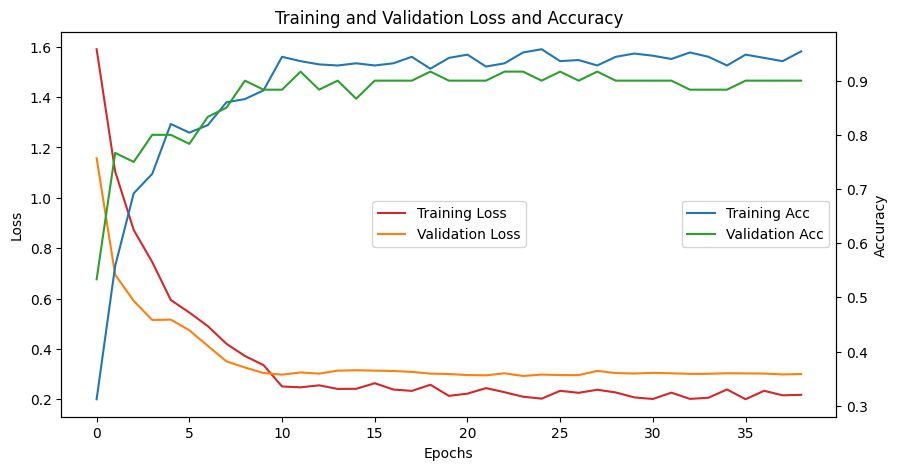

In [13]:
# Learning curve plots (train and val Loss / train and val Accuracy)
train_loss = trained_model.train_losses
val_loss = trained_model.val_losses

train_acc = trained_model.train_accuracies
val_acc = trained_model.val_accuracies

# Move tensors to CPU and convert to NumPy arrays if needed
train_loss = [loss.cpu().numpy() if isinstance(loss, torch.Tensor) else loss for loss in train_loss]
val_loss = [loss.cpu().numpy() if isinstance(loss, torch.Tensor) else loss for loss in val_loss]
train_acc = [acc.cpu().numpy() if isinstance(acc, torch.Tensor) else acc for acc in train_acc]
val_acc = [acc.cpu().numpy() if isinstance(acc, torch.Tensor) else acc for acc in val_acc]

def plot_loss_acc(train_loss, val_loss, train_acc, val_acc):
    fig, ax1 = plt.subplots(figsize=(10, 5))

    # Plot the training and validation loss on the primary y-axis
    ax1.plot(train_loss, label='Training Loss', color='tab:red')
    ax1.plot(val_loss, label='Validation Loss', color='tab:orange')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')

    # Create a secondary y-axis for accuracy
    ax2 = ax1.twinx()
    ax2.plot(train_acc, label='Training Acc', color='tab:blue')
    ax2.plot(val_acc, label='Validation Acc', color='tab:green')
    ax2.set_ylabel('Accuracy')


    # Title and legends
    ax1.set_title('Training and Validation Loss and Accuracy')
    ax1.legend(loc='center')
    ax2.legend(loc='right')

    plt.show()

plot_loss_acc(train_loss, val_loss, train_acc, val_acc)

## **14. Save Your Trained Model**

In [14]:
# Save Model - un comment below if you would like to save the resulting model
current_time = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
save_path = f'/content/drive/MyDrive/model_ft_{current_time}.pth'
torch.save(trained_model.state_dict(), save_path)
print(f'Model saved to {save_path}')

Model saved to /content/drive/MyDrive/model_ft_2025-04-08_04-29-52.pth


## **15. Model Evaluation with Test Data**

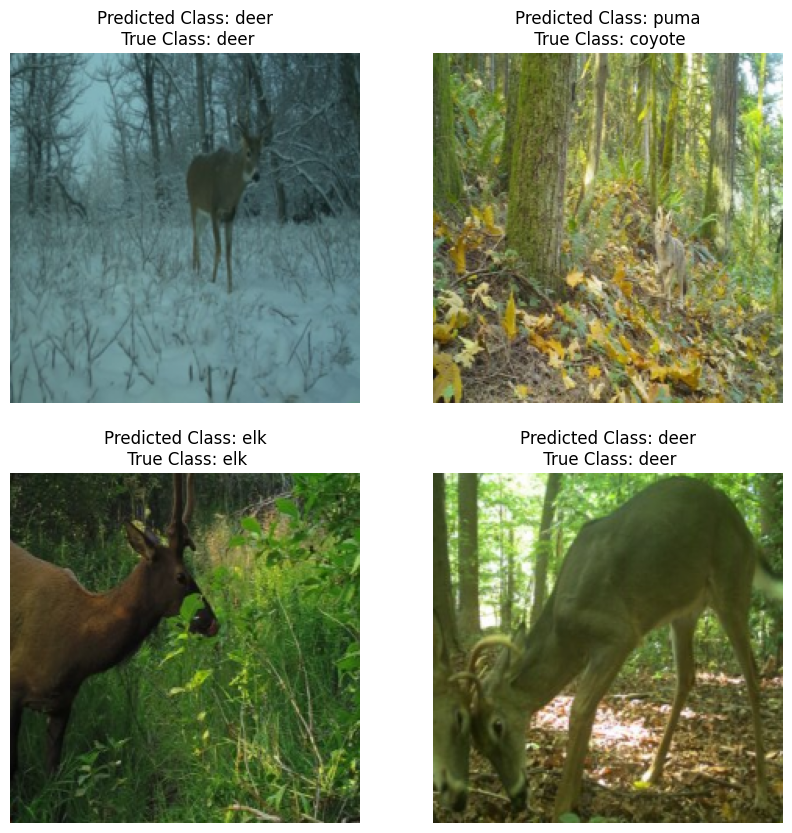

In [15]:
# Try out some test images (original 'class_names=test_data.classes')
visualize_model(trained_model, dataloader={'test': test_loader}, class_names=new_labels)

# Class numbers in order from 0 to 4
# 0 - deer, 1 - puma, 2 - elk, 3 - coyote, 4 - bear

## **16. Model Loading (if needed)**



### <summary> If you jump to this section and assuming you have a trained model to load/visualize- make sure you run the code in the listed sections before you attempt this section:</summary>

---
  * Run code in these sections:
    * 4
    * 5
    * 7
    * 10
    * 11
---
---

Raw Test Labels: ['class_0', 'class_1', 'class_2', 'class_3', 'class_4']
Reset Test Labels: ['deer', 'puma', 'elk', 'coyote', 'bear']


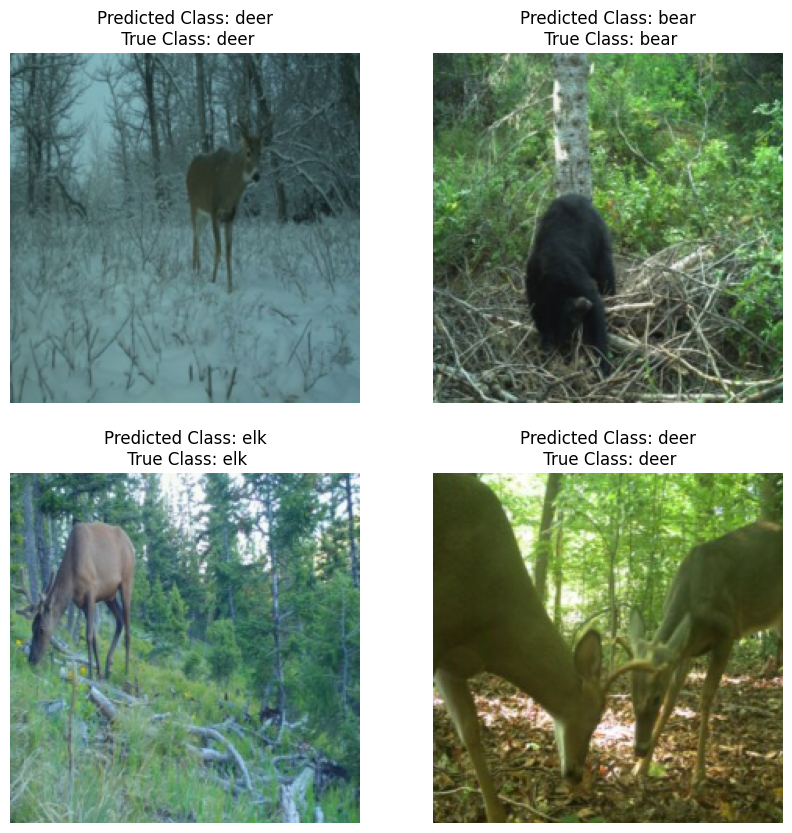

In [19]:
# Load and Visualize Model on Test Images
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# This specific model is available in the Section 5 GitHub link
model_name = 'Day_model_ft_2025-03-31_03-39-55.pth'

model_path = (
    f'/content/drive/My Drive/'
    f'{model_name}'
    )

# If you would like to read in a specific model, change 'save_path' to 'model_name'
# This is assuming you have specified a specific model above that is in your
# Google Drive 'My Drive'
model_ft.load_state_dict(torch.load(save_path, map_location=torch.device('cpu')))
model_ft.eval()


# Original labels based on dataset build folders
class_labels = test_data.classes
print("Raw Test Labels:", class_labels)

# Reset labels
print("Reset Test Labels:", new_labels)

# Plot some images and predictions (original 'class_names=test_data.classes')
visualize_model(model_ft, dataloader={'test': test_loader}, class_names=new_labels)

# Class numbers in order from 0 to 4
# 0 - deer, 1 - puma, 2 - elk, 3 - coyote, 4 - bear

## **17. Confusion Matrix Comparison**

[[10  0  3  0  0]
 [ 0 10  0  2  1]
 [ 1  0 10  2  0]
 [ 0  3  0 10  0]
 [ 0  1  0  0 12]]


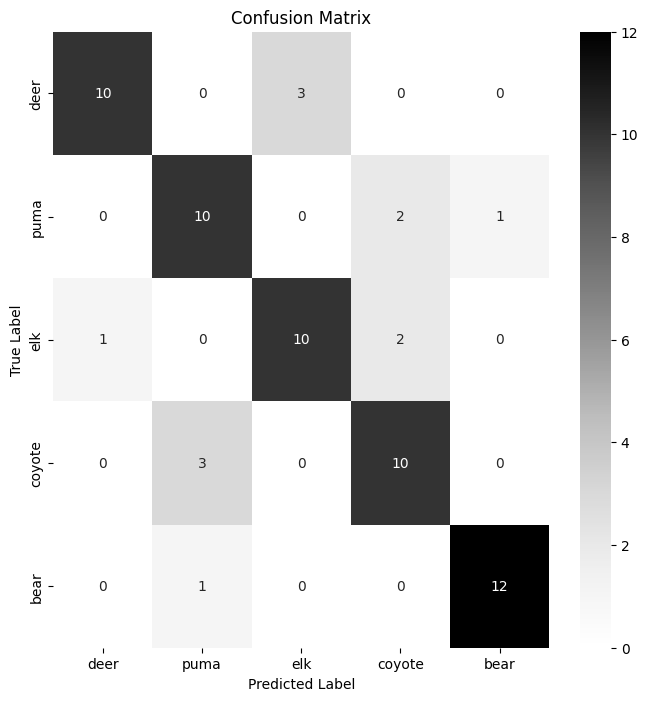

In [17]:
# Set model to evaluation mode so predictions can be made and stored
model_ft.eval()

all_preds = []
all_labels = []

# Load in some test images to generate predictions
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model_ft(inputs)
        _, preds = torch.max(outputs, 1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Get predictions and the actual labels for each
all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

# Generate confusion matrix
conf_mx = confusion_matrix(all_labels, all_preds)
print(conf_mx)

# Plot the confusion matrix (original 'xticklabels=test_data.classes' and 'yticklabels=test_data.classes')
plt.figure(figsize=(8, 8))
sns.heatmap(conf_mx, annot=True, fmt='d', cmap='Grays', xticklabels=new_labels, yticklabels=new_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Class numbers in order from 0 to 4
# 0 - deer, 1 - puma, 2 - elk, 3 - coyote, 4 - bear

In [18]:
# This code cell is to determine the processing time for all cells.

# Get the time once this cell is processed
endT_all = np.datetime64('now')

# Display total time
# if this cell is reprocessed individually from 'Runtime -> Run all' it can give
# an inaccurate total time since it will grab a new current time

timeMinutes = ((endT_all - startT_all).astype('m8[s]').item().total_seconds())/60

print(f"Time elapsed for all cells (seconds): {endT_all - startT_all}")
print(f"Time in minutes: {timeMinutes}")

# GPU example:
# CPU example: 107.85 minutes

Time elapsed for all cells (seconds): 6471 seconds
Time in minutes: 107.85


---
__Extra Help Links__

* Python help:
  * Effective Python: 125 Specific Ways to Write Better Python, 3rd Edition
by Brett Slatkin
    * O'Reilly access: [Effective Python: 125 Specific Ways to Write Better Python, 3rd Edition](https://www.oreilly.com/library/view/effective-python-125/9780138172398/)
    * Generic book website: [Effective Python](https://effectivepython.com/)
* PyTorch help:
  * [General Tutorials](https://pytorch.org/tutorials/)
  * [Image Transformations](https://pytorch.org/vision/stable/transforms.html)
  * [Transfer Learning](https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html)
* Scikit-Learn Examples:
  * [General Examples](https://scikit-learn.org/stable/auto_examples/index.html)
* Ultralytics YOLO Docs:
  * [Ultralytics YOLO tutorials](https://docs.ultralytics.com/)
---